In [2]:
#DEVELOPED BY RITHYM GULATI
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'historicalweatherdataforindiancities:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2373708%2F4159658%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T125748Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D74c651f867de07e76ae36e45648d9b2dda3a319733613a3874436c5249b5b8e804ae90e2a5356fd7a36bec8cf503500e37ff6b71783cf750593a89a9939babea6e777412cc766832b7e981822f2cdbdbff102c9f1977fea9680948dbad3545670a780ba06e95d4e628b61ad09b4e401bd26785e0ff6ea06c1588c7c6fcff3ae33e48006fefedbdf56b3bc4d4e3639d6b899ea0714736975672bac843dc4931d0f99f91c6a3e2bbb4cfed08a95423b72c28b6e8533f7c11f5758566f3b5640f9cd3bcd82d90db49043e11a8cf6c88d1faff6b745ff9c7eed3ea488fbe35ec717ba19d76ef702e222d75a6aae8dade2112dcc42eb78540259dedbafac38e27af32'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 624464 bytes downloaded
Downloaded and uncompressed: historicalweatherdataforindiancities
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/weather_Rourkela_2021_2022.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Lucknow_1990_2022.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/weather_Bhubhneshwar_1990_2022.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Rajasthan_1990_2022_Jodhpur.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Station_GeoLocation_Longitute_Latitude_Elevation_EPSG_4326.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Mumbai_1990_2022_Santacruz.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Delhi_NCR_1990_2022_Safdarjung.csv
/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Bangalore_1990_2022_Ban

# READING THE DATA INTO A DATAFRAME

In [4]:
df = pd.read_csv('/kaggle/input/historicalweatherdataforindiancities/Temperature_And_Precipitation_Cities_IN/Bangalore_1990_2022_BangaloreCity.csv')
df.shape

(11894, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11824 non-null  float64
 2   tmin    10505 non-null  float64
 3   tmax    11265 non-null  float64
 4   prcp    7274 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


In [6]:
df.isna().sum()

time       0
tavg      70
tmin    1389
tmax     629
prcp    4620
dtype: int64

# Mean and median value of all columns

In [7]:
df.mean(numeric_only=True)

tavg    23.840426
tmin    19.385131
tmax    29.932827
prcp     4.414119
dtype: float64

In [8]:
df.median(numeric_only=True)

tavg    23.5
tmin    19.8
tmax    29.5
prcp     0.0
dtype: float64

In [9]:
df.describe()

,tavg,tmin,tmax,prcp
count,11824.000000,10505.000000,11265.000000,7274.000000
mean,23.840426,19.385131,29.932827,4.414119
std,2.309899,2.367239,2.957866,12.994655
min,17.200000,9.300000,19.800000,0.000000
25%,22.300000,18.100000,27.900000,0.000000
50%,23.500000,19.800000,29.500000,0.000000
75%,25.200000,20.800000,32.000000,2.000000
max,32.400000,27.900000,39.200000,271.300000


<Axes: xlabel='tavg', ylabel='Count'>

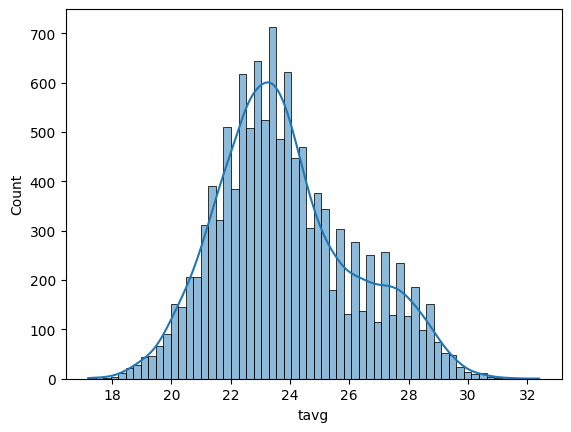

In [10]:
sns.histplot(df['tavg'],kde=True)

# Convert Time column from object/string type to datetime type

In [14]:
df['time']=pd.to_datetime(df['time'],dayfirst=True)

In [12]:
import datetime as dt
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

In [13]:
df.head()

,time,tavg,tmin,tmax,prcp,day,month,year
0,1990-01-01,22.9,19.1,28.4,NaN,1,1,1990
1,1990-01-02,21.7,NaN,26.5,0.0,2,1,1990
2,1990-01-03,21.0,16.4,26.5,0.0,3,1,1990
3,1990-01-04,20.8,NaN,27.4,0.0,4,1,1990
4,1990-01-05,20.4,14.2,26.1,0.0,5,1,1990


In [15]:
df.drop(['tmin','tmax','prcp'],axis=1,inplace=True)

In [16]:
df.head()

,time,tavg,day,month,year
0,1990-01-01,22.9,1,1,1990
1,1990-01-02,21.7,2,1,1990
2,1990-01-03,21.0,3,1,1990
3,1990-01-04,20.8,4,1,1990
4,1990-01-05,20.4,5,1,1990


In [17]:
df[df['tavg'].isnull()]

,time,tavg,day,month,year
145,1990-05-26,NaN,26,5,1990
146,1990-05-27,NaN,27,5,1990
147,1990-05-28,NaN,28,5,1990
148,1990-05-29,NaN,29,5,1990
149,1990-05-30,NaN,30,5,1990
...,...,...,...,...,...
4925,2003-06-27,NaN,27,6,2003
6348,2007-05-20,NaN,20,5,2007
6448,2007-08-28,NaN,28,8,2007
6503,2007-10-22,NaN,22,10,2007


In [18]:
df['tavg'] = df['tavg'].fillna(df['tavg'].mean())

In [19]:
df.isna().sum()

time     0
tavg     0
day      0
month    0
year     0
dtype: int64

In [20]:
year_wise = pd.DataFrame(df.groupby(['year'])['tavg'].agg('mean').reset_index())

In [21]:
year_wise = year_wise.set_index(year_wise['year'])
print(year_wise['tavg'].mean())
year_wise.head(2)

23.84255205877088


,year,tavg
year,,
1990,1990,23.708400
1991,1991,23.629047


# year wise plot

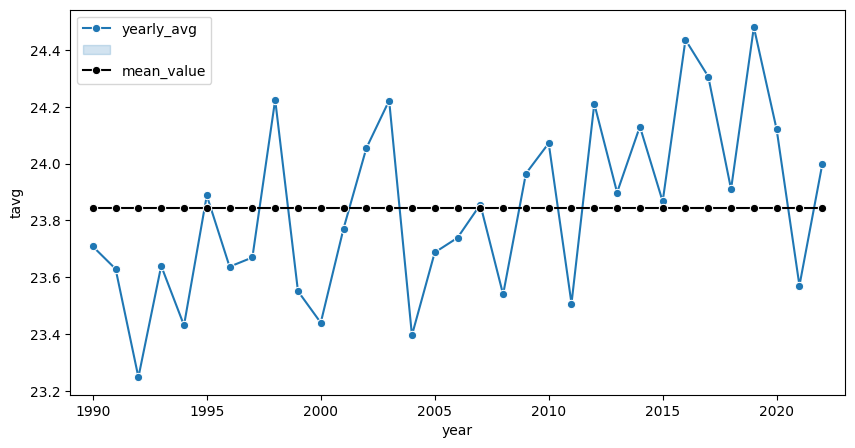

In [22]:
plt.figure(figsize=(10,5))
plt.xlim([1989,2023])
sns.lineplot(x=year_wise.index,y=year_wise['tavg'],marker='o')
sns.lineplot(x =year_wise.index , y=[23.84255205877088]*len(year_wise.index),color='black',marker='o')
plt.legend(['yearly_avg',None,'mean_value'])
plt.show()

In [23]:
df.head(5)

,time,tavg,day,month,year
0,1990-01-01,22.9,1,1,1990
1,1990-01-02,21.7,2,1,1990
2,1990-01-03,21.0,3,1,1990
3,1990-01-04,20.8,4,1,1990
4,1990-01-05,20.4,5,1,1990


In [24]:
fig = px.line(df,x='time',y='tavg',title='Temperature vs Day Wise')
fig.update_traces(line_color='rgb(204,120,100)', line_width=1)

In [25]:
df_new = df[['time','tavg']]
df_new.columns=['ds','y']
df_new.tail(5)

,ds,y
11889,2022-07-21,23.7
11890,2022-07-22,23.2
11891,2022-07-23,23.1
11892,2022-07-24,22.8
11893,2022-07-25,24.1


In [26]:
df_new[df_new['ds']=='2018-12-31']

,ds,y
10591,2018-12-31,20.9


In [27]:
train = df_new[:10592]
test = df_new[10592:]

In [30]:
import plotly.graph_objs as go
fig = go.Figure([

    go.Scatter(
        name='Train',
        x=df['time'],
        y=df['tavg'],
        mode='lines',
        marker=dict(color='blue'),
        line=dict(width=1),
        showlegend=True
    ),
    go.Scatter(
        name='Test',
        x=test['ds'],
        y=test['y'],
        mode='lines',
        marker=dict(color="orange"),
        line=dict(width=1),
        showlegend=True)])
fig.update_layout(
    yaxis_title='Temperature Avearage',
    title='Train and Test',
    hovermode="x"
)
fig.show()

USING PROPHET TO TRAIN THE MODEL


In [32]:
from prophet import Prophet
model=Prophet()

In [33]:
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi4qoorb5/fbtv2lfd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi4qoorb5/ga5e6ci9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=729', 'data', 'file=/tmp/tmpi4qoorb5/fbtv2lfd.json', 'init=/tmp/tmpi4qoorb5/ga5e6ci9.json', 'output', 'file=/tmp/tmpi4qoorb5/prophet_modelqe3oe0h4/prophet_model-20240505130335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:03:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:03:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
test.shape

(1302, 2)

In [35]:
test.tail(2)

,ds,y
11892,2022-07-24,22.8
11893,2022-07-25,24.1


In [36]:
new_df= model.make_future_dataframe(periods=1302)
new_df.tail(5)

,ds
11889,2022-07-21
11890,2022-07-22
11891,2022-07-23
11892,2022-07-24
11893,2022-07-25


In [37]:
result = model.predict(new_df)
result.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
11889,2022-07-21,24.347189,22.124093,25.338141,23.809060,24.870521,-0.653857,-0.653857,-0.653857,0.016642,0.016642,0.016642,-0.670499,-0.670499,-0.670499,0.0,0.0,0.0,23.693332
11890,2022-07-22,24.347292,21.979674,25.415691,23.808756,24.870765,-0.706714,-0.706714,-0.706714,-0.014123,-0.014123,-0.014123,-0.692591,-0.692591,-0.692591,0.0,0.0,0.0,23.640577
11891,2022-07-23,24.347395,21.932783,25.272405,23.808452,24.871009,-0.735215,-0.735215,-0.735215,-0.022363,-0.022363,-0.022363,-0.712852,-0.712852,-0.712852,0.0,0.0,0.0,23.612180
11892,2022-07-24,24.347498,21.886244,25.331740,23.808147,24.871253,-0.726307,-0.726307,-0.726307,0.004773,0.004773,0.004773,-0.731080,-0.731080,-0.731080,0.0,0.0,0.0,23.621191
11893,2022-07-25,24.347601,21.896582,25.311575,23.807843,24.871498,-0.739030,-0.739030,-0.739030,0.008081,0.008081,0.008081,-0.747111,-0.747111,-0.747111,0.0,0.0,0.0,23.608571


In [38]:
data = result[['ds','trend','yhat','yhat_lower','yhat_upper']]
data.columns=['date','trend','final_outcome(predicted)','final_outcome_lower_limit','final_outcome_upper_limit']
data.tail(5)

,date,trend,final_outcome(predicted),final_outcome_lower_limit,final_outcome_upper_limit
11889,2022-07-21,24.347189,23.693332,22.124093,25.338141
11890,2022-07-22,24.347292,23.640577,21.979674,25.415691
11891,2022-07-23,24.347395,23.612180,21.932783,25.272405
11892,2022-07-24,24.347498,23.621191,21.886244,25.331740
11893,2022-07-25,24.347601,23.608571,21.896582,25.311575


In [39]:
data.shape

(11894, 5)

In [40]:
import plotly.graph_objs as go
fig = go.Figure([

    go.Scatter(
        name='Test_Actual',
        x=test['ds'],
        y=test['y'],
        mode='lines',
        marker=dict(color='orange'),
        line=dict(width=3),
        showlegend=True
    ),
    go.Scatter(
        name='Test_predicted',
        x=data[10592:]['date'],
        y=data[10592:]['final_outcome(predicted)'],
        mode='lines',
        marker=dict(color="red"),
        line=dict(width=1),
        showlegend=True),
    go.Scatter(
        name='Test_predicted_Lower',
        x=data[10592:]['date'],
        y=data[10592:]['final_outcome_lower_limit'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=True),
    go.Scatter(
        name='Test_predicted_Upper',
        x=data[10592:]['date'],
        y=data[10592:]['final_outcome_upper_limit'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=True,
        fillcolor = 'rgba(68, 68, 68, 0.3)',
        fill = 'tonexty'),
])
fig.update_layout(
    yaxis_title='Temperature Avearage',
    title='Actual vs Predicteed',
    hovermode="x"
)
fig.show()

In [41]:
from prophet.plot import plot_plotly
from plotly.offline import iplot
fig=plot_plotly(model,result)
iplot(fig)

In [42]:
test['predicted'] = data[10592:]['final_outcome(predicted)']

<ipython-input-42-a6c6c183fcd4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
test['mse'] = (test['y']-test['predicted'])**2

<ipython-input-43-37b4b31eff52>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
test['smape'] = abs(test['y']-test['predicted'])/(abs(test['y']+test['predicted']))/2

<ipython-input-44-5f7ae0c62ee3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
test['mape'] = abs((test['y']-test['predicted'])/test['y'])

<ipython-input-45-b62f9bce4cb2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
print('MSE  = ',test['mse'].mean())
print('RMSE  = ',test['mse'].mean()**0.5)
print('MAPE = ',test['mape'].mean()*100)
print('SMAPE = ',test['smape'].mean()*100)

MSE  =  1.63166669579582
RMSE  =  1.2773670951593437
MAPE =  4.173807215452403
SMAPE =  1.0220289824104003
